<table align="center" width=100%>
    <tr>
        <td width="25%">
            <img src="football.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#BD614D ";size=30px>
                    <b>Player Recommendation System
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Our aim is to provide player recommendations to football clubs based on various factors which include positions, ratings and market value

# Data Dictionary

**Input variables:** 

**1 - Player_ID** : Unique ID for each player

**2 - Player_Name** : Name of the player

**3 - Club** : Club the player represents

**4 - League** : League in which the club belongs

**5 - Age** : Age of the player

**6 - Height** : Height of the player

**7 - Position_Category** : Position category in which the player plays (1-GoalKeeper,2-Defender,3-Midfielder,4-Forward)

**8 - Nationality** : Country the player represents

**9 - Games_Played** : Number of league games played by the player

**10 - National_Caps** : Number of times the player has represented his country

**11 - Poisition** : Position which the player plays on field

**12 - Market_Value** : Market value of the player (Millions) 

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
        - 4.1.5 - [Indexing](#indexing)
        - 4.1.6 - [Final Dataset](#final_dataset)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
5. **[K-Means Clustering](#kmeans)**
6. **[Recommendation Systems](#reco)**
    - 6.1 - [Popularity Based Recommendation System](#popular)
    - 6.2 - [Content Based Recommendation System](#content)
    - 6.3 - [Model Based Recommendation System](#model)
6. **[Conclusion](#conclu)**
7. **[References](#Refer)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# 2. Set Options <a id='set_options'></a>

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [3]:
df = pd.read_csv('European_Rosters.csv')
df.head()

,Player_ID,Player_Name,Club,League,Age,Height,Position_Category,Nationality,Games_Played,National_Caps,Position,Market_Value
0,1,Anthony Modeste,1. FC Koln,Bundesliga,31.000000,1.870000,4,France,1,16,CF,7.000000
1,2,Benno Schmitz,1. FC Koln,Bundesliga,25.000000,1.820000,2,Germany,0,11,RB,1.000000
2,3,Birger Verstraete,1. FC Koln,Bundesliga,25.000000,1.750000,3,Belgium,0,1,CDM,4.000000
3,4,Brady Scott,1. FC Koln,Bundesliga,20.000000,1.870000,1,United States,14,0,GK,0.100000
4,5,Christian Clemens,1. FC Koln,Bundesliga,28.000000,1.790000,3,Germany,15,5,RM,1.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 12 columns):
Player_ID            4205 non-null int64
Player_Name          4205 non-null object
Club                 4205 non-null object
League               4205 non-null object
Age                  4188 non-null float64
Height               4185 non-null float64
Position_Category    4205 non-null int64
Nationality          4195 non-null object
Games_Played         4205 non-null int64
National_Caps        4205 non-null int64
Position             4205 non-null object
Market_Value         4198 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 394.3+ KB


# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [5]:
df.shape

(4205, 12)

**In this dataset, we have 4205 records across 12 features**

### 4.1.2 Data Types <a id='Data_Types'></a>

In [6]:
df.dtypes

Player_ID              int64
Player_Name           object
Club                  object
League                object
Age                  float64
Height               float64
Position_Category      int64
Nationality           object
Games_Played           int64
National_Caps          int64
Position              object
Market_Value         float64
dtype: object

**The variable Position_Category is categorical as per the data definition, but it is considered as int. Thus, we will change it**

In [7]:
df['Position_Category'] = df['Position_Category'].astype('object')

In [8]:
df.dtypes

Player_ID              int64
Player_Name           object
Club                  object
League                object
Age                  float64
Height               float64
Position_Category     object
Nationality           object
Games_Played           int64
National_Caps          int64
Position              object
Market_Value         float64
dtype: object

**In this dataset, we have 6 object,4 integer and 2 float datatypes**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [9]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Height,20,0.475624
Age,17,0.404281
Nationality,10,0.237812
Market_Value,7,0.166468
Player_ID,0,0.000000
Player_Name,0,0.000000
Club,0,0.000000
League,0,0.000000
Position_Category,0,0.000000
Games_Played,0,0.000000


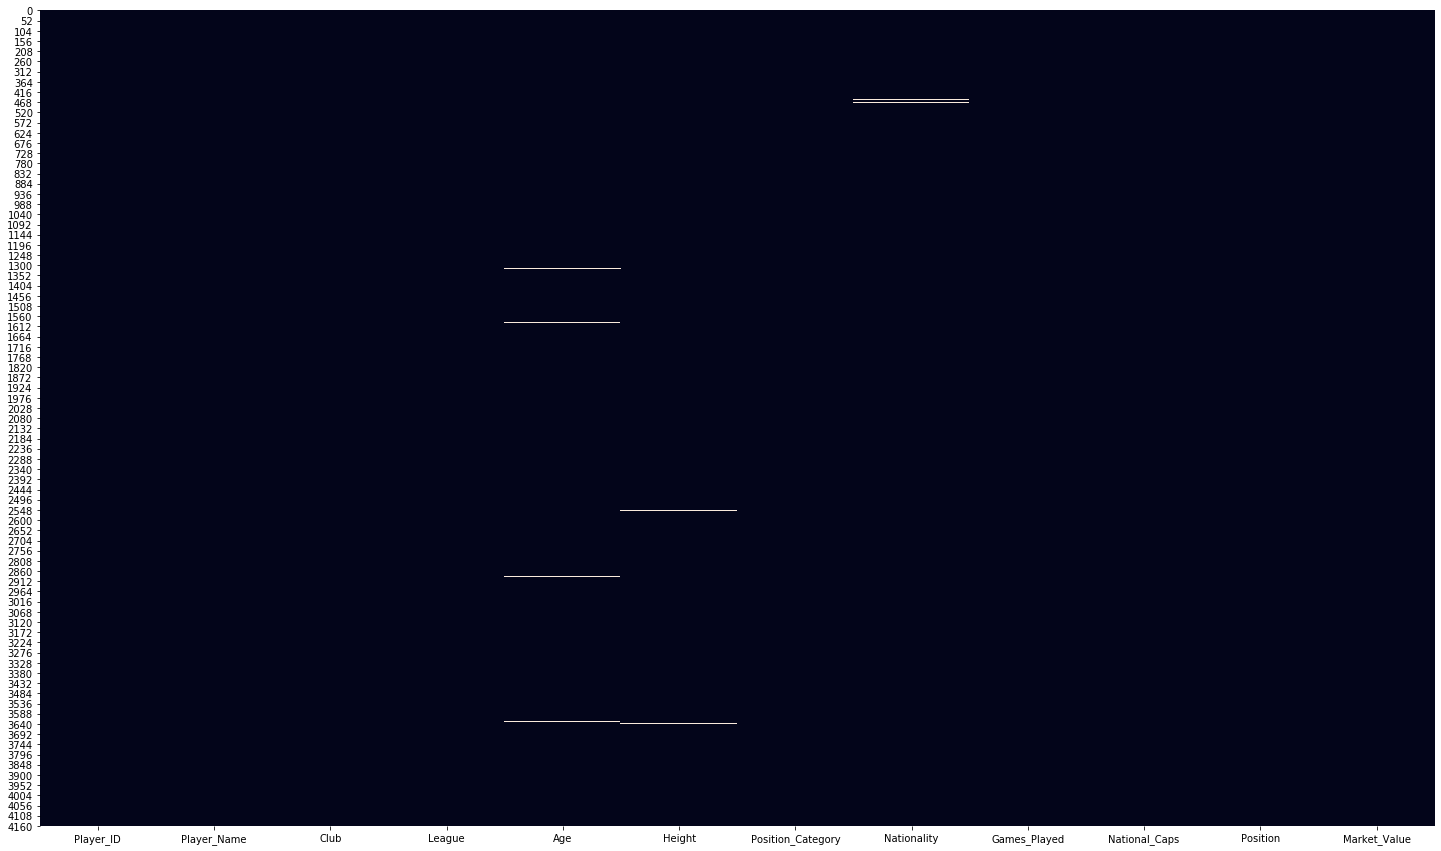

In [10]:
plt.figure(figsize=(25,15))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

**Missing Values Replacement**

**Since not a lot of data will be lost if we were to drop these rows, we will be dropping them**

In [11]:
df = df.dropna()

In [12]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Player_ID,0,0.000000
Player_Name,0,0.000000
Club,0,0.000000
League,0,0.000000
Age,0,0.000000
Height,0,0.000000
Position_Category,0,0.000000
Nationality,0,0.000000
Games_Played,0,0.000000
National_Caps,0,0.000000


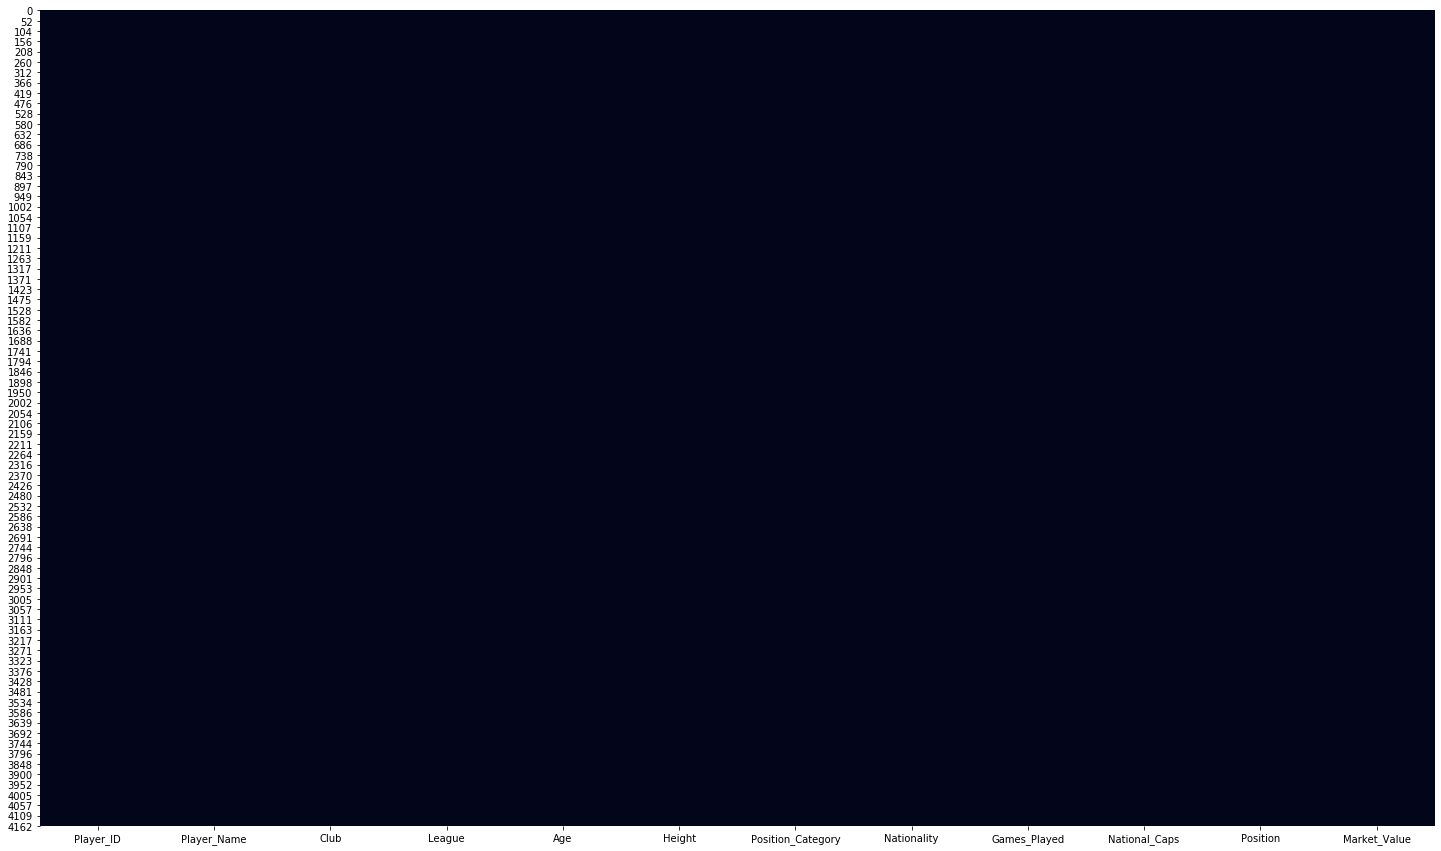

In [13]:
plt.figure(figsize=(25,15))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

**Visual proof that there are no NULL values**

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [14]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


### 4.1.5 Indexing <a id='indexing'></a>

In [15]:
df.shape

(4151, 12)

**There are 5329 records after dropping missing values**

In [16]:
df.tail()

,Player_ID,Player_Name,Club,League,Age,Height,Position_Category,Nationality,Games_Played,National_Caps,Position,Market_Value
4200,4210,Olivier Deschacht,Zulte Waregem,Jupiler Pro League,38.000000,1.870000,2,Belgium,0,20,CB,0.100000
4201,4211,Omar Govea,Zulte Waregem,Jupiler Pro League,23.000000,1.760000,3,Mexico,0,3,CDM,2.000000
4202,4212,Saido Berahino,Zulte Waregem,Jupiler Pro League,26.000000,1.790000,4,Burundi,4,10,CF,5.000000
4203,4213,Sammy Bossut,Zulte Waregem,Jupiler Pro League,34.000000,1.860000,1,Belgium,13,1,GK,0.600000
4204,4214,Sandy Walsh,Zulte Waregem,Jupiler Pro League,24.000000,1.850000,2,Netherlands,0,1,RB,0.800000


**The last 5 index values range from 4200-4204 but we have only 4151 records thus the indexes need to be reset**

In [17]:
df.reset_index(inplace=True,drop=True)

In [18]:
df.tail()

,Player_ID,Player_Name,Club,League,Age,Height,Position_Category,Nationality,Games_Played,National_Caps,Position,Market_Value
4146,4210,Olivier Deschacht,Zulte Waregem,Jupiler Pro League,38.000000,1.870000,2,Belgium,0,20,CB,0.100000
4147,4211,Omar Govea,Zulte Waregem,Jupiler Pro League,23.000000,1.760000,3,Mexico,0,3,CDM,2.000000
4148,4212,Saido Berahino,Zulte Waregem,Jupiler Pro League,26.000000,1.790000,4,Burundi,4,10,CF,5.000000
4149,4213,Sammy Bossut,Zulte Waregem,Jupiler Pro League,34.000000,1.860000,1,Belgium,13,1,GK,0.600000
4150,4214,Sandy Walsh,Zulte Waregem,Jupiler Pro League,24.000000,1.850000,2,Netherlands,0,1,RB,0.800000


### 4.1.6 Final Dataset <a id='final_dataset'></a>

In [19]:
df.shape

(4151, 12)

In [20]:
df.tail()

,Player_ID,Player_Name,Club,League,Age,Height,Position_Category,Nationality,Games_Played,National_Caps,Position,Market_Value
4146,4210,Olivier Deschacht,Zulte Waregem,Jupiler Pro League,38.000000,1.870000,2,Belgium,0,20,CB,0.100000
4147,4211,Omar Govea,Zulte Waregem,Jupiler Pro League,23.000000,1.760000,3,Mexico,0,3,CDM,2.000000
4148,4212,Saido Berahino,Zulte Waregem,Jupiler Pro League,26.000000,1.790000,4,Burundi,4,10,CF,5.000000
4149,4213,Sammy Bossut,Zulte Waregem,Jupiler Pro League,34.000000,1.860000,1,Belgium,13,1,GK,0.600000
4150,4214,Sandy Walsh,Zulte Waregem,Jupiler Pro League,24.000000,1.850000,2,Netherlands,0,1,RB,0.800000


**Since there were no Null Values and duplicates, our final dataset is the same as that from the beginning**

## 4.2 Understanding the Dataset <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

**Numerical Variables**

In [21]:
df.describe(include=np.number)

,Player_ID,Age,Height,Games_Played,National_Caps,Market_Value
count,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000
mean,2110.632378,25.576006,1.825965,2.561792,11.645146,7.901259
std,1217.278686,4.366349,0.066541,10.321202,20.413770,14.930290
min,1.000000,16.000000,1.590000,0.000000,0.000000,0.025000
25%,1058.500000,22.000000,1.780000,0.000000,0.000000,0.750000
50%,2109.000000,25.000000,1.830000,0.000000,3.000000,2.500000
75%,3164.500000,29.000000,1.870000,2.000000,13.000000,8.000000
max,4214.000000,42.000000,2.040000,255.000000,176.000000,200.000000


From the above table, we can infer:
    1. The Age group of players lie between 16-42 averaging at 25
    2. Less than 50% of the players havent played for their club yet
     

**Categorical Variables**

In [22]:
df.describe(exclude=np.number)

,Player_Name,Club,League,Position_Category,Nationality,Position
count,4151,4151,4151,4151,4151,4151
unique,4151,160,9,4,116,13
top,Nemanja Mihajlovic,RSC Anderlecht,Serie A,2,France,CB
freq,1,36,536,1396,414,728


From the above table, we can infer:
    1. For variable Club, it is apparent that data has been taken from 160 different Clubs
    2. Most of the players are from France
    3. Most of the players are playing in Seria A League
    4. The most frequented position category is 2 which is Defence and position is CB

### 4.2.2 Correlation <a id='correlation'></a>

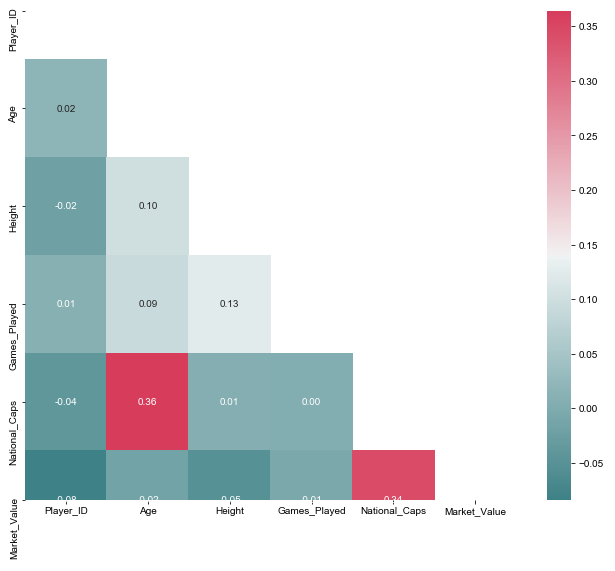

In [23]:
corr_matrix=df.corr()

plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(200, 5, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

**Interpretation:** 

We can see that there is a moderate positive correlation between National_caps and Age of the players. 

Otherwise, there is very little to no correlation between the other variables 

We can see that National_Caps and Age are slightly correlated but does not meet multicollinearity ,
Hence it implies that there is no multicollinearity in the data

### 4.2.3 Visualising the Data <a id='analyze_cat_var'></a>

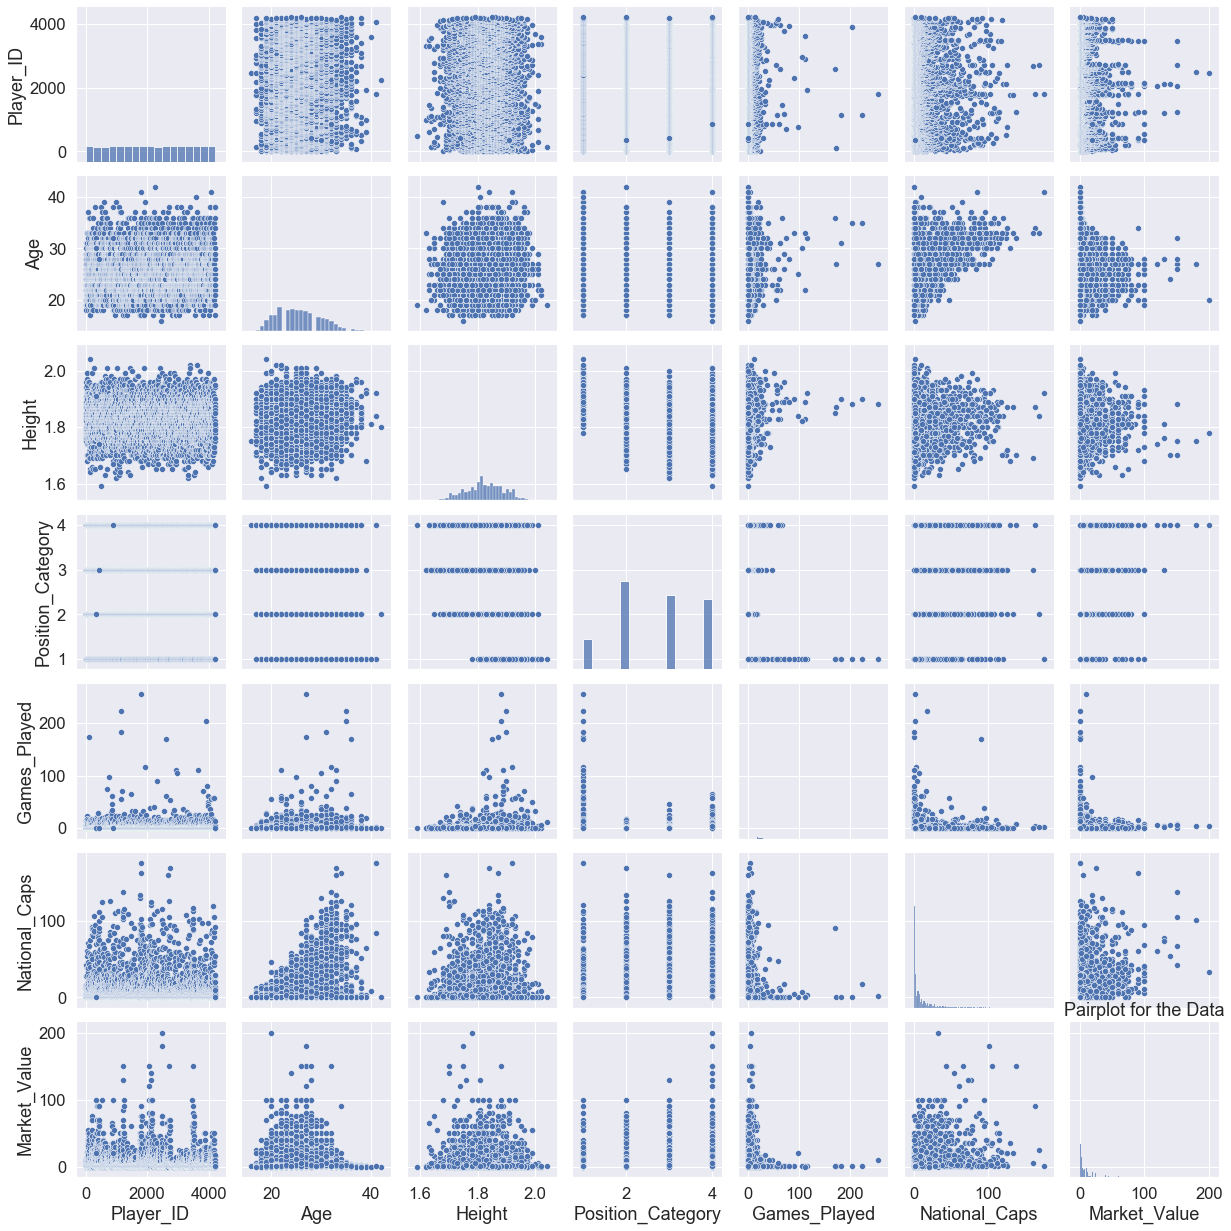

In [24]:
sns.pairplot(df)
plt.title('Pairplot for the Data')
plt.show()

**Interpretation:** With the help of the above pair plot, you get a quick idea about the pairwise relationship between the variables.

<table align="left">
    <tr>
        <td width="20%">
            <img src="pos.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Number of players per position
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\shriya bittu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


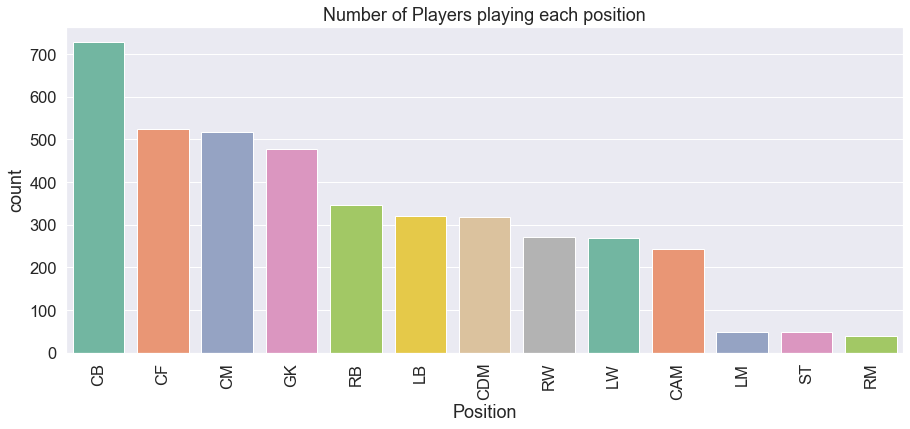

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('Position',data=df,palette='Set2',order=df['Position'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Players playing each position')
plt.show()

**CB (Center Back) is the position where maximum number of plyers prefer playing followed by center forward whilst there are very few players who play as Left-Mid,Right-Mid and Second Striker**

<table align="left">
    <tr>    
        <td width="20%">
            <img src="mkval.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Top 15 players with most market value
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

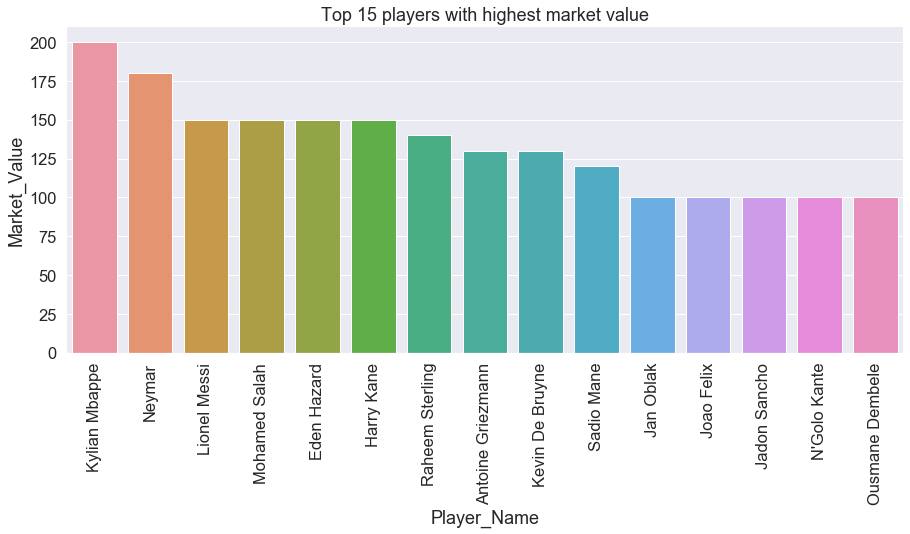

In [26]:
dfmarketv = df.nlargest(15, 'Market_Value').sort_values('Market_Value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="Player_Name", y="Market_Value",  data=dfmarketv)
plt.xticks(rotation=90)
plt.title('Top 15 players with highest market value')
plt.show()

**Kylian Mbappe remains the player with the highest estimated market value followed by Neymar**

<table align="left">
    <tr>    
        <td width="20%">
            <img src="mkval.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Top 20 Clubs with highest average market value
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

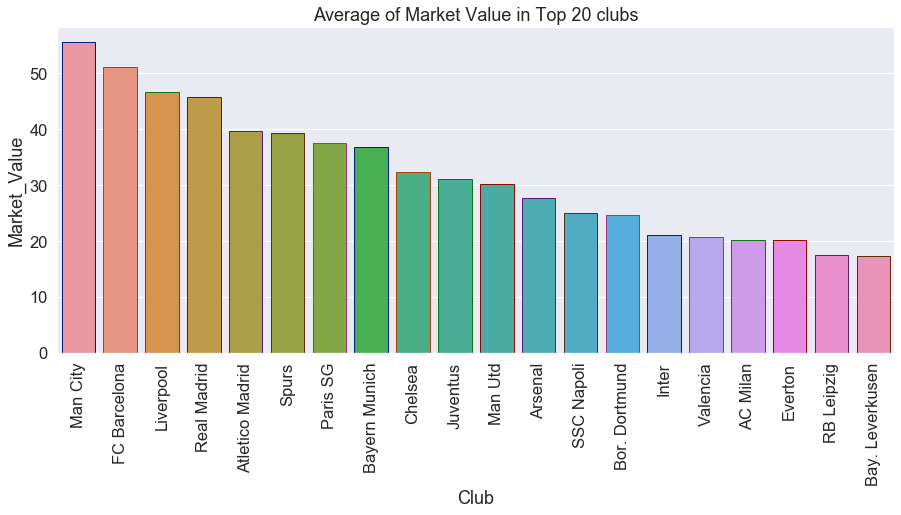

In [27]:
df_meanmv=pd.DataFrame(df.groupby(['Club'])['Market_Value'].mean()).reset_index().sort_values('Market_Value',ascending=False).head(20)
plt.subplots(figsize=(15,6))
sns.barplot(x="Club", y="Market_Value",data=df_meanmv,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value in Top 20 clubs')
plt.show()

**Manchester City holds the highest average market value of the players that play for the said club**

<table align="left">
    <tr>    
        <td width="20%">
            <img src="int.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Top 10 players with most international appearances
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

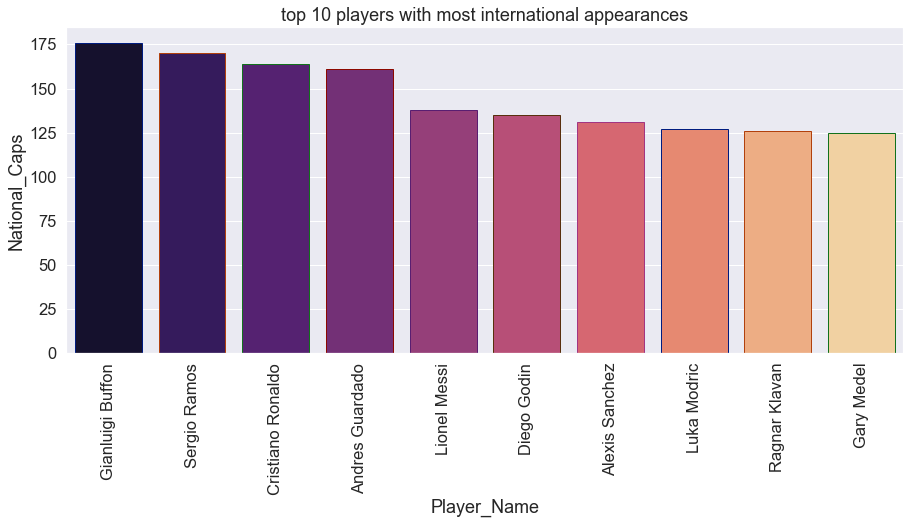

In [28]:
dfview = df.nlargest(10, 'National_Caps').sort_values('National_Caps',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="Player_Name", y="National_Caps",  data=dfview ,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players with most international appearances')
plt.show()

**Gianluigi Buffon holds the record for the most international appearances in world football**

# K-Means Clustering<a id="kmeans"></a>

In [29]:
df_num = df.select_dtypes(include=np.number)
df_num.drop('Player_ID',axis=1,inplace=True)

C:\Users\shriya bittu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
scaled_filter = df_num
scaled_filter.head()

,Age,Height,Games_Played,National_Caps,Market_Value
0,31.000000,1.870000,1,16,7.000000
1,25.000000,1.820000,0,11,1.000000
2,25.000000,1.750000,0,1,4.000000
3,20.000000,1.870000,14,0,0.100000
4,28.000000,1.790000,15,5,1.750000


In [31]:
std_scale = StandardScaler()
num_norm = std_scale.fit_transform(scaled_filter)
X = pd.DataFrame(num_norm, columns = scaled_filter.columns)

X.head()

,Age,Height,Games_Played,National_Caps,Market_Value
0,1.242376,0.661856,-0.151337,0.213355,-0.060372
1,-0.131935,-0.089652,-0.248237,-0.031607,-0.462288
2,-0.131935,-1.141764,-0.248237,-0.521532,-0.261330
3,-1.277195,0.661856,1.108358,-0.570524,-0.522575
4,0.555220,-0.540557,1.205258,-0.325562,-0.412048


In [32]:
wcss  = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## Elbow plot

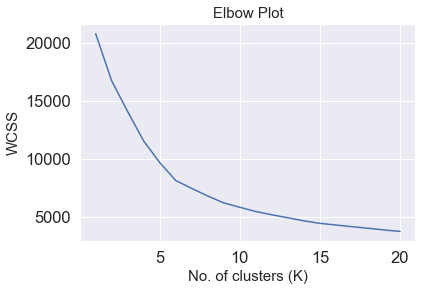

In [33]:
plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.show()

**Interpretation:** We can see that the for K = 2, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 2, the WCSS is decreasing slowly.



<a id="silhouette"></a>
## Silhouette Score

In [34]:
n_clusters = [2, 3, 4, 5, 6,7,8,9]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.4312982966875954)
For 3 clusters the silhouette score is 0.23430353379857752)
For 4 clusters the silhouette score is 0.23680219820382895)
For 5 clusters the silhouette score is 0.2600612902746153)
For 6 clusters the silhouette score is 0.26425844500038126)
For 7 clusters the silhouette score is 0.2680986473226039)
For 8 clusters the silhouette score is 0.2441266448527725)
For 9 clusters the silhouette score is 0.2527756268552383)


**For 2 cluster the silhouette score is maximum**

In [35]:
new_clusters = KMeans(n_clusters = 2, random_state = 10)

new_clusters.fit(X)

df['Cluster'] = new_clusters.labels_

In [36]:
df.head()

,Player_ID,Player_Name,Club,League,Age,Height,Position_Category,Nationality,Games_Played,National_Caps,Position,Market_Value,Cluster
0,1,Anthony Modeste,1. FC Koln,Bundesliga,31.000000,1.870000,4,France,1,16,CF,7.000000,1
1,2,Benno Schmitz,1. FC Koln,Bundesliga,25.000000,1.820000,2,Germany,0,11,RB,1.000000,1
2,3,Birger Verstraete,1. FC Koln,Bundesliga,25.000000,1.750000,3,Belgium,0,1,CDM,4.000000,1
3,4,Brady Scott,1. FC Koln,Bundesliga,20.000000,1.870000,1,United States,14,0,GK,0.100000,1
4,5,Christian Clemens,1. FC Koln,Bundesliga,28.000000,1.790000,3,Germany,15,5,RM,1.750000,1


**Barplot to visualize the cluster sizes**

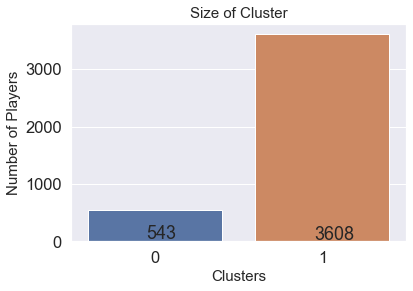

In [37]:
sns.countplot(data= df, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Players', fontsize = 15)

plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])

plt.show()

**The 2nd cluster is the largest cluster containing maximum no of players**

<a id="inter"></a>
## Analyzing the Clusters

C:\Users\shriya bittu\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


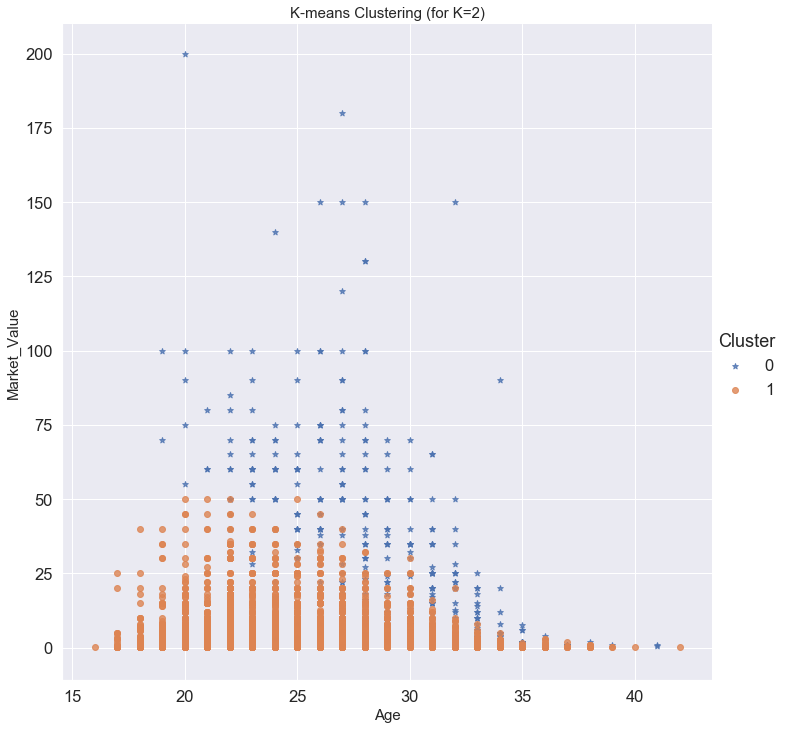

In [38]:
sns.lmplot(x = 'Age', y = 'Market_Value', data = df, hue = 'Cluster', 
                markers = ['*', 'o'], fit_reg = False, size = 10)

plt.title('K-means Clustering (for K=2)', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Market_Value', fontsize = 15)

plt.show()

**Interpreation:** From the above plot, we can see that as the Age increses Market value decreses between players Therefore, we see that the age between (20 to 30) having high Market_value. Also, we have the players with zero visibilty.

**Now let us understand the summary statistics for each cluster**

***Cluster 1***

In [39]:
len(df[df['Cluster'] == 0])

543

**Interpretation:** The output shows that there are 543 records in Cluster 1

In [40]:
df[df.Cluster==0].describe()

,Player_ID,Age,Height,Games_Played,National_Caps,Market_Value,Cluster
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,1903.744015,29.064457,1.825930,2.709024,53.143646,27.458978,0.000000
std,1182.492284,3.825228,0.065764,8.786734,28.938183,30.251613,0.000000
min,12.000000,19.000000,1.630000,0.000000,0.000000,0.025000,0.000000
25%,870.500000,27.000000,1.780000,0.000000,33.000000,4.000000,0.000000
50%,1950.000000,29.000000,1.830000,1.000000,48.000000,18.000000,0.000000
75%,2714.000000,32.000000,1.870000,3.000000,69.500000,40.000000,0.000000
max,4189.000000,41.000000,1.990000,170.000000,176.000000,200.000000,0.000000


 **Interpretation:**
 
 1.The average age of a player is 29 years and average players appearances for their national team is 53 times and the maximum     is 170 times
 
 2.Here the market value is low along with the no of games played 

In [41]:
df[df.Cluster==0].describe(exclude=np.number)

,Player_Name,Club,League,Position_Category,Nationality,Position
count,543,543,543,543,543,543
unique,543,119,9,4,85,13
top,Federico Bernardeschi,Juventus,Premier League,4,France,CB
freq,1,20,160,177,34,102


 **Interpretation:**
 
 1. The 543 players in this cluster are spread across 119 clubs having the most players playing in the Premier League
 
 2. 34 players are Frenchmen which is the highest in this cluster

***Cluster 2***

In [42]:
len(df[df['Cluster'] == 1])

3608

**Interpretation:** The output shows that there are 3608 records in Cluster 2

In [43]:
df[df.Cluster==1].describe()

,Player_ID,Age,Height,Games_Played,National_Caps,Market_Value,Cluster
count,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000
mean,2141.768847,25.050998,1.825970,2.539634,5.399667,4.957844,1.000000
std,1219.552702,4.198651,0.066666,10.533698,7.440135,7.259994,0.000000
min,1.000000,16.000000,1.590000,0.000000,0.000000,0.025000,1.000000
25%,1087.750000,22.000000,1.780000,0.000000,0.000000,0.650000,1.000000
50%,2178.500000,25.000000,1.830000,0.000000,2.000000,2.000000,1.000000
75%,3196.250000,28.000000,1.870000,2.000000,8.000000,6.000000,1.000000
max,4214.000000,42.000000,2.040000,255.000000,47.000000,50.000000,1.000000


**Interpretation:** 
    
   1. The avergae age of players in this cluster is 25
   2. The market value of players in this category ranges from 0.02 to 50 Million
    

In [44]:
df[df.Cluster==1].describe(exclude=np.number)

,Player_Name,Club,League,Position_Category,Nationality,Position
count,3608,3608,3608,3608,3608,3608
unique,3608,160,9,4,112,13
top,Raphinha,F. Dusseldorf,Ligue 1,2,France,CB
freq,1,32,481,1232,380,626


 **Interpretation:**
 
 1. The 3608 players in this cluster are spread across 160 clubs having the most players playing in the Ligue 1
 
 2. 380 players are Frenchmen which is the highest in this cluster

## 6.Recommendation Systems<a id="reco"></a>

## 6.1 Popularity Based Recommendation System<a id="popular"></a>

**Most Popular club in terms of market value**

In [45]:
pop_df_club = df.copy()

In [46]:
pop_df_club['Players_Count'] = pop_df_club.groupby('Club')['Market_Value'].transform('sum')

In [47]:
popularity_table=pop_df_club.groupby('Club').agg({'Market_Value':'mean','Players_Count':'count'})

In [48]:
top_popularity_table=popularity_table[popularity_table['Market_Value']>30]

In [49]:
top_popularity_table.sort_values('Market_Value',ascending=False).head(15)

,Market_Value,Players_Count
Club,,
Man City,55.543478,23
FC Barcelona,51.130435,23
Liverpool,46.641304,23
Real Madrid,45.750000,26
Atletico Madrid,39.659091,22
Spurs,39.400000,25
Paris SG,37.523214,28
Bayern Munich,36.777083,24
Chelsea,32.280000,25


**Most popular league in terms of market value**

In [50]:
pop_df_league = df.copy()

In [51]:
pd.DataFrame(pop_df_league.groupby('League')['Market_Value'].mean().sort_values(ascending=False))

,Market_Value
League,
Premier League,18.593850
LaLiga,12.820146
Serie A,9.830550
Bundesliga,8.928707
Ligue 1,6.747042
Premier Liga,2.679451
Jupiler Pro League,2.483073
Liga NOS,2.394898
Eredivisie,2.213367


In [52]:
pop_df_league['Players_Count'] = pop_df_league.groupby('League')['Market_Value'].transform('sum')

In [53]:
popularity_table=pop_df_league.groupby('League').agg({'Market_Value':'mean','Players_Count':'count'})

In [54]:
top_popularity_table=popularity_table[popularity_table['Market_Value']>10]

In [55]:
top_popularity_table.sort_values('Market_Value',ascending=False).head(15)

,Market_Value,Players_Count
League,,
Premier League,18.593850,500
LaLiga,12.820146,479


## 6.2 Content Based Recommendation System<a id="content"></a>

**Find ideal replacements for a particular player**

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [72]:
sample = df.select_dtypes(include='number')
print(sample.head())

   Player_ID       Age   Height  Games_Played  National_Caps  Market_Value  \
0          1 31.000000 1.870000             1             16      7.000000   
1          2 25.000000 1.820000             0             11      1.000000   
2          3 25.000000 1.750000             0              1      4.000000   
3          4 20.000000 1.870000            14              0      0.100000   
4          5 28.000000 1.790000            15              5      1.750000   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [73]:
recommendations = NearestNeighbors(n_neighbors=6,algorithm='kd_tree')
recommendations.fit(X)
player_index = recommendations.kneighbors(X)[1]

In [74]:
# Define a function to get Player's Index
def get_index(x):
    return df[df['Player_Name']==x].index.tolist()[0]

# Fetch 5 indexes of similar players
def recommend_similar(player):
    print("These are 5 players similar to {} : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print("Name: {}\nNational_Caps: {}\nMarket Value: €{}\nAge: {}\nClub: {}\n".format(df.iloc[i]['Player_Name'],df.iloc[i]['National_Caps'], df.iloc[i]['Market_Value'], df.iloc[i]['Age'], df.iloc[i]['Club']))

In [75]:
recommend_similar('Anthony Modeste')

These are 5 players similar to Anthony Modeste : 
Name: Kevin-Prince Boateng
National_Caps: 15
Market Value: €7.0
Age: 32.0
Club: Fiorentina

Name: Allan Nyom
National_Caps: 17
Market Value: €3.0
Age: 31.0
Club: Getafe

Name: Ivan Radovanovic
National_Caps: 10
Market Value: €3.0
Age: 31.0
Club: Genoa

Name: Lars Bender
National_Caps: 19
Market Value: €9.0
Age: 30.0
Club: Bay. Leverkusen

Name: Roman Neustädter
National_Caps: 12
Market Value: €1.7
Age: 31.0
Club: Dinamo Moscow



## 6.3 Model Based Recommendation System<a id="model"></a>

In [80]:
from surprise import Reader,SVD,Dataset
from surprise.model_selection import cross_validate

In [85]:
df1=df.copy()
df1['total_games']=df1['Games_Played']+df1['National_Caps']

In [86]:
df1=df1.drop_duplicates(['Player_Name','total_games','Market_Value'])

In [87]:
reader=Reader(rating_scale=(0,200))
data = Dataset.load_from_df(df1[['Player_Name','total_games','Market_Value']],reader)

In [89]:
svd=SVD()
cross_validate(svd,data,measures=['rmse'],cv=3,return_train_measures=True)

{'test_rmse': array([13.86756327, 15.14396502, 14.40379583]),
 'train_rmse': array([0.82179835, 0.82411703, 0.84943902]),
 'fit_time': (0.2483353614807129, 0.13564801216125488, 0.17752504348754883),
 'test_time': (0.04790616035461426,
  0.005970478057861328,
  0.008016109466552734)}

In [91]:
trainset=data.build_full_trainset()
svd.fit(trainset)

In [92]:
players=df1['Player_Name'].unique()
totg=df1['total_games']
marv=df1['Market_Value']

In [93]:
test=[[play,tg,ma] for (play,tg,ma) in zip(players,totg,marv)]

In [94]:
predictions=svd.test(test)
pred=pd.DataFrame(predictions)
pred.sort_values('est',ascending=False)

,uid,iid,r_ui,est,details
2436,Kylian Mbappe,38,200.000000,199.939262,{'was_impossible': False}
2445,Neymar,106,180.000000,179.973301,{'was_impossible': False}
3418,Harry Kane,49,150.000000,149.998629,{'was_impossible': False}
1204,Lionel Messi,146,150.000000,149.979626,{'was_impossible': False}
2659,Eden Hazard,107,150.000000,149.976416,{'was_impossible': False}
2020,Mohamed Salah,73,150.000000,149.965377,{'was_impossible': False}
2096,Raheem Sterling,62,140.000000,139.979030,{'was_impossible': False}
2090,Kevin De Bruyne,76,130.000000,129.982858,{'was_impossible': False}
1192,Antoine Griezmann,82,130.000000,129.962121,{'was_impossible': False}
2024,Sadio Mane,68,120.000000,119.980837,{'was_impossible': False}
